In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## *Data set loading*

In [79]:
iris = sns.load_dataset("iris")

## *Information about the data*

In [80]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## *Splitting the data into a training set and testing set*

*Creating the set for training and testing the data*

In [153]:
from sklearn.model_selection import train_test_split

In [188]:
X = iris.drop('species',axis=1)
y,levels = pd.factorize(iris['species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### *SVC*

In [189]:
from sklearn.svm import SVC

*Model training*

In [190]:
model = SVC()

model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

*Model Prediction & Evaluation*

In [191]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [192]:
predictions = model.predict(X_test)

*Results*

In [193]:
print('Confusion Matrix:','\n','\n', confusion_matrix(y_test,predictions))
print('\n')
print('Classification Report:','\n','\n',classification_report(y_test,predictions,target_names=levels))

Confusion Matrix: 
 
 [[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


Classification Report: 
 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



*The outputs are great. We have results over 90 percent.*
*The SVC model worked really well.*

### *GridSearch*

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

*Create a GridSearchCV object and fit it to the training data.*

In [196]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

*Model Prediction & Evaluation*

In [197]:
grid_predictions = grid.predict(X_test)

In [198]:
print('Confusion Matrix:','\n','\n', confusion_matrix(y_test,grid_predictions))
print('\n')
print('Classification Report:','\n','\n',classification_report(y_test,grid_predictions,target_names=levels))

Confusion Matrix: 
 
 [[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


Classification Report: 
 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### *Random Forest*

*Creating the set for training and testing the data*

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
X = iris.drop('species',axis=1)
y,levels = pd.factorize(iris['species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

*Model training*

In [216]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

*Model Prediction & Evaluation*

In [217]:
rfc_pred = rfc.predict(X_test)

*Results*

In [218]:
print('Confusion Matrix:','\n','\n', confusion_matrix(y_test,rfc_pred))
print('\n')
print('Classification Report:','\n','\n',classification_report(y_test,rfc_pred,target_names=levels))

Confusion Matrix: 
 
 [[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


Classification Report: 
 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



*Random Forest model worked well too, but SVC model had a better overall perfomance result for this particular case*

### *Confusion Matrix heatmap comparison among the models*

#### *SVC*

In [222]:
cf_svc = confusion_matrix(y_test,predictions)

In [223]:
hm_svc = pd.DataFrame(cf_svc,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

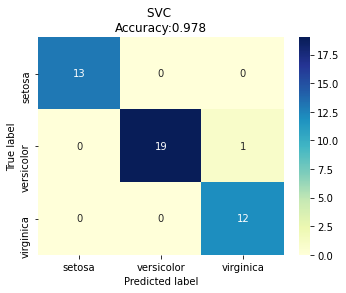

In [224]:
plt.figure(figsize=(5.5,4))
sns.heatmap(hm_svc, annot=True,cmap='YlGnBu')
plt.title('SVC \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### *GridSearchCV*

In [225]:
cf_grid = confusion_matrix(y_test,grid_predictions)

In [226]:
hm_grid = pd.DataFrame(cf_grid,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

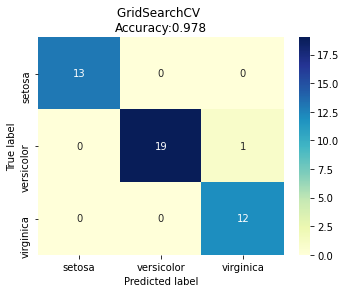

In [228]:
plt.figure(figsize=(5.5,4))
sns.heatmap(hm_grid, annot=True,cmap='YlGnBu')
plt.title('GridSearchCV \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, grid_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### *Random Forest*

In [234]:
cf_rfc = confusion_matrix(y_test,rfc_pred)

In [235]:
hm_rfc = pd.DataFrame(cf_rfc,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

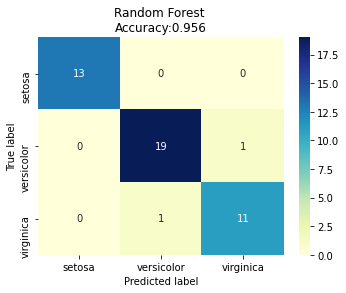

In [236]:
plt.figure(figsize=(5.5,4))
sns.heatmap(hm_rfc, annot=True,cmap='YlGnBu')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, rfc_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()